In [12]:
import pandas as pd
from data import citylearn_challenge_2022_phase_1 as competition_data
import os.path as osp


consumptions_path = osp.join(osp.dirname(competition_data.__file__), "consumptions/building_consumptions.csv")
consumptions = pd.read_csv(consumptions_path)[[f"{i}" for i in range(5)]]
# consumptions

In [13]:
consumption_building_1 = consumptions["0"].to_frame()
consumption_building_2 = consumptions["1"].to_frame()
consumption_building_3 = consumptions["2"].to_frame()
consumption_building_4 = consumptions["3"].to_frame()
consumption_building_5 = consumptions["4"].to_frame()

In [14]:
data = consumption_building_4
data = data.rename(columns={"3":"Consumption"})
# data

In [15]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from skforecast.model_selection import grid_search_forecaster


forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 24, # This value will be replaced in the grid search
                 transformer_y = StandardScaler()
             )

forecaster.fit(y=data.Consumption)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 8737
    Number of folds: 729
    Number of steps per fold: 12
    Last fold only includes 1 observations.

Data partition in fold: 0
    Training:   0 -- 23  (n=24)
    Validation: 24 -- 35  (n=12)
Data partition in fold: 1
    Training:   0 -- 23  (n=24)
    Validation: 36 -- 47  (n=12)
Data partition in fold: 2
    Training:   0 -- 23  (n=24)
    Validation: 48 -- 59  (n=12)
Data partition in fold: 3
    Training:   0 -- 23  (n=24)
    Validation: 60 -- 71  (n=12)
Data partition in fold: 4
    Training:   0 -- 23  (n=24)
    Validation: 72 -- 83  (n=12)
Data partition in fold: 5
    Training:   0 -- 23  (n=24)
    Validation: 84 -- 95  (n=12)
Data partition in fold: 6
    Training:   0 -- 23  (n=24)
    Validation: 96 -- 107  (n=12)
Data partition in fold: 7
    Training:   0 -- 23  (n=24)
    Validation: 108 -- 119  

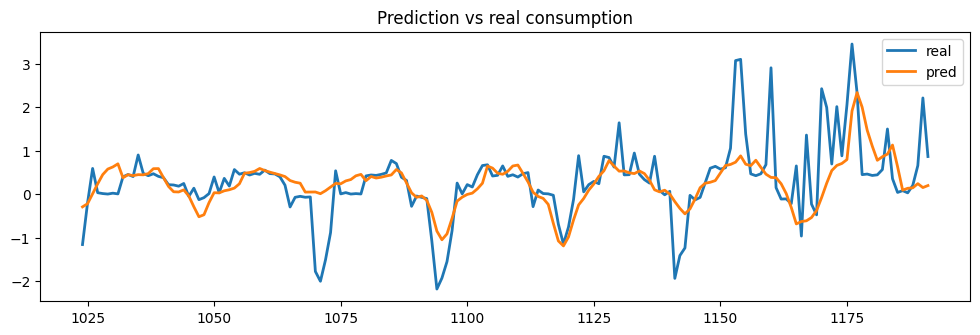

In [16]:
from matplotlib import pyplot as plt
from skforecast.model_selection import backtesting_forecaster

metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = data.Consumption,
                          initial_train_size = None,
                          fixed_train_size   = False,
                          steps              = 12,
                          metric             = 'mean_absolute_error',
                          refit              = False,
                          verbose            = True
                      )

fig, ax = plt.subplots(figsize=(12, 3.5))
data.loc[predictions[1000:1168].index, 'Consumption'].plot(ax=ax, linewidth=2, label='real')
predictions[1000:1168].plot(linewidth=2, label='prediction', ax=ax)
ax.set_title('Prediction vs real consumption')
ax.legend();

In [63]:
# Lags used as predictors
lags_grid = [ [1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 25], [1, 2, 25, 26], [1, 2, 3, 25, 26, 27], [1, 2, 3, 4, 25, 26, 27, 28], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33], [1, 25, 49], [1, 2, 25, 26, 49, 50], [1, 2, 3, 25, 26, 27, 49, 50, 51], [1, 2, 3, 4, 25, 26, 27, 28, 49, 50, 51, 52], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29, 49, 50, 51, 52, 53], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30, 49, 50, 51, 52, 53, 54], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31, 49, 50, 51, 52, 53, 54, 55], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32, 49, 50, 51, 52, 53, 54, 55, 56], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33, 49, 50, 51, 52, 53, 54, 55, 56, 57]]

# Regressor's hyperparameters
param_grid = {'alpha': np.logspace(-3, 5, 10),
              'tol': np.logspace(-1, -10, 10),
              'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}


results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = data.Consumption,
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 1,
                   metric             = 'mean_squared_error',
                   refit              = False,
                   initial_train_size = len(data) - 1,
                   fixed_train_size   = False,
                   return_best        = True,
                   verbose            = False
               )
results_grid

Number of models compared: 18900.


loop lags_grid: 100%|█████████████████████████████████████| 27/27 [20:06<00:00, 44.67s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1] 
  Parameters: {'alpha': 100000.0, 'solver': 'saga', 'tol': 0.001}
  Backtesting metric: 0.390181335928311



,lags,params,mean_squared_error,alpha,solver,tol
692,[1],"{'alpha': 100000.0, 'solver': 'saga', 'tol': 0...",0.390181,100000.000000,saga,0.001000
691,[1],"{'alpha': 100000.0, 'solver': 'saga', 'tol': 0...",0.390181,100000.000000,saga,0.010000
694,[1],"{'alpha': 100000.0, 'solver': 'saga', 'tol': 1...",0.390215,100000.000000,saga,0.000010
693,[1],"{'alpha': 100000.0, 'solver': 'saga', 'tol': 0...",0.390216,100000.000000,saga,0.000100
695,[1],"{'alpha': 100000.0, 'solver': 'saga', 'tol': 1...",0.390218,100000.000000,saga,0.000001
...,...,...,...,...,...,...
8580,"[1, 2, 3, 4, 25, 26, 27, 28]","{'alpha': 0.05994842503189409, 'solver': 'spar...",5.418507,0.059948,sparse_cg,0.100000
8510,"[1, 2, 3, 4, 25, 26, 27, 28]","{'alpha': 0.007742636826811269, 'solver': 'spa...",5.418542,0.007743,sparse_cg,0.100000
8500,"[1, 2, 3, 4, 25, 26, 27, 28]","{'alpha': 0.007742636826811269, 'solver': 'lsq...",5.418542,0.007743,lsqr,0.100000
8430,"[1, 2, 3, 4, 25, 26, 27, 28]","{'alpha': 0.001, 'solver': 'lsqr', 'tol': 0.1}",5.418547,0.001000,lsqr,0.100000


In [17]:
nsload_data_path = osp.join(osp.dirname(competition_data.__file__), "load_data.csv")
df_loads = pd.read_csv(nsload_data_path)
df_load_1 = df_loads[:8760]
df_load_2 = df_loads[8760:8760*2]
df_load_3 = df_loads[8760*2:8760*3]
df_load_4 = df_loads[8760*3:8760*4]
df_load_5 = df_loads[8760*4:8760*5]

In [56]:
df_load_1 = df_load_1["non_shiftable_load"].to_frame()
# df_load_1

In [57]:
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 24, # This value will be replaced in the grid search
                 transformer_y = StandardScaler()
             )

forecaster.fit(y=df_load_1.non_shiftable_load)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 8736
    Number of folds: 728
    Number of steps per fold: 12

Data partition in fold: 0
    Training:   8760 -- 8783  (n=24)
    Validation: 8784 -- 8795  (n=12)
Data partition in fold: 1
    Training:   8760 -- 8783  (n=24)
    Validation: 8796 -- 8807  (n=12)
Data partition in fold: 2
    Training:   8760 -- 8783  (n=24)
    Validation: 8808 -- 8819  (n=12)
Data partition in fold: 3
    Training:   8760 -- 8783  (n=24)
    Validation: 8820 -- 8831  (n=12)
Data partition in fold: 4
    Training:   8760 -- 8783  (n=24)
    Validation: 8832 -- 8843  (n=12)
Data partition in fold: 5
    Training:   8760 -- 8783  (n=24)
    Validation: 8844 -- 8855  (n=12)
Data partition in fold: 6
    Training:   8760 -- 8783  (n=24)
    Validation: 8856 -- 8867  (n=12)
Data partition in fold: 7
    Training:   8760 -- 8783  (n=24)
    V

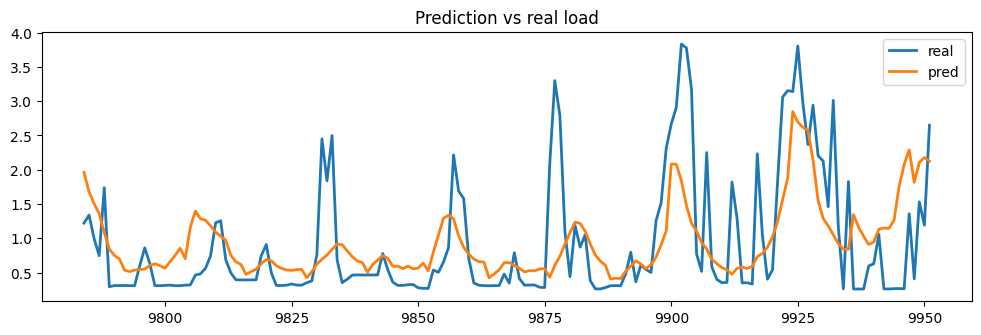

In [58]:
from matplotlib import pyplot as plt
from skforecast.model_selection import backtesting_forecaster

metric, predictions = backtesting_forecaster(
                          forecaster         = forecaster,
                          y                  = df_load_1.non_shiftable_load,
                          initial_train_size = None,
                          fixed_train_size   = False,
                          steps              = 1,
                          metric             = 'mean_squared_error',
                          refit              = False,
                          verbose            = True
                      )

fig, ax = plt.subplots(figsize=(12, 3.5))
df_load_1.loc[predictions[1000:1168].index, 'non_shiftable_load'].plot(ax=ax, linewidth=2, label='real')
predictions[1000:1168].plot(linewidth=2, label='prediction', ax=ax)
ax.set_title('Prediction vs real load')
ax.legend();

In [59]:
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=123),
                 lags          = 24, # This value will be replaced in the grid search
                 transformer_y = StandardScaler()
             )

# Lags used as predictors
lags_grid = [ [1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 25], [1, 2, 25, 26], [1, 2, 3, 25, 26, 27], [1, 2, 3, 4, 25, 26, 27, 28], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33], [1, 25, 49], [1, 2, 25, 26, 49, 50], [1, 2, 3, 25, 26, 27, 49, 50, 51], [1, 2, 3, 4, 25, 26, 27, 28, 49, 50, 51, 52], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29, 49, 50, 51, 52, 53], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30, 49, 50, 51, 52, 53, 54], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31, 49, 50, 51, 52, 53, 54, 55], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32, 49, 50, 51, 52, 53, 54, 55, 56], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33, 49, 50, 51, 52, 53, 54, 55, 56, 57]]

# Regressor's hyperparameters
# param_grid = {'alpha': np.logspace(-3, 5, 10),
#               'tol': np.logspace(-1, -10, 10),
#               'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = df_load_1.non_shiftable_load,
                   param_grid         = {},
                   lags_grid          = lags_grid,
                   steps              = 12,
                   metric             = 'mean_absolute_error',
                   refit              = False,
                   initial_train_size = len(df_load_1) - 1,
                   fixed_train_size   = False,
                   return_best        = True,
                   verbose            = False
               )
results_grid

Number of models compared: 27.


loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [ 1  2  3  4  5  6  7  8  9 25 26 27 28 29 30 31 32 33] 
  Parameters: {}
  Backtesting metric: 0.2387739892896373



,lags,params,mean_absolute_error
17,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29...",{},0.238774
16,"[1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 3...",{},0.245398
15,"[1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31]",{},0.245407
13,"[1, 2, 3, 4, 5, 25, 26, 27, 28, 29]",{},0.253461
14,"[1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30]",{},0.254695
12,"[1, 2, 3, 4, 25, 26, 27, 28]",{},0.262723
11,"[1, 2, 3, 25, 26, 27]",{},0.285517
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",{},0.295989
7,"[1, 2, 3, 4, 5, 6, 7, 8]",{},0.301660
6,"[1, 2, 3, 4, 5, 6, 7]",{},0.303690


In [46]:
nsload_data_path = osp.join(osp.dirname(competition_data.__file__), "solar_data.csv")
df_solars = pd.read_csv(nsload_data_path)
df_solar_1 = df_solars[:8760]
df_solar_2 = df_solars[8760:8760*2]
df_solar_3 = df_solars[8760*2:8760*3]
df_solar_4 = df_solars[8760*3:8760*4]
df_solar_5 = df_solars[8760*4:8760*5]

In [47]:
df_solar_1 = df_solar_4["solar_generation"].to_frame()

In [116]:
forecaster = ForecasterAutoreg(
    regressor=Ridge(random_state=42),
    lags=24,  # This value will be replaced in the grid search
    transformer_y=StandardScaler()
)

forecaster.fit(y=df_solar_1.solar_generation)

Information of backtesting process
----------------------------------
Number of observations used for initial training: 24
Number of observations used for backtesting: 8736
    Number of folds: 728
    Number of steps per fold: 12

Data partition in fold: 0
    Training:   26280 -- 26303  (n=24)
    Validation: 26304 -- 26315  (n=12)
Data partition in fold: 1
    Training:   26280 -- 26303  (n=24)
    Validation: 26316 -- 26327  (n=12)
Data partition in fold: 2
    Training:   26280 -- 26303  (n=24)
    Validation: 26328 -- 26339  (n=12)
Data partition in fold: 3
    Training:   26280 -- 26303  (n=24)
    Validation: 26340 -- 26351  (n=12)
Data partition in fold: 4
    Training:   26280 -- 26303  (n=24)
    Validation: 26352 -- 26363  (n=12)
Data partition in fold: 5
    Training:   26280 -- 26303  (n=24)
    Validation: 26364 -- 26375  (n=12)
Data partition in fold: 6
    Training:   26280 -- 26303  (n=24)
    Validation: 26376 -- 26387  (n=12)
Data partition in fold: 7
    Training: 

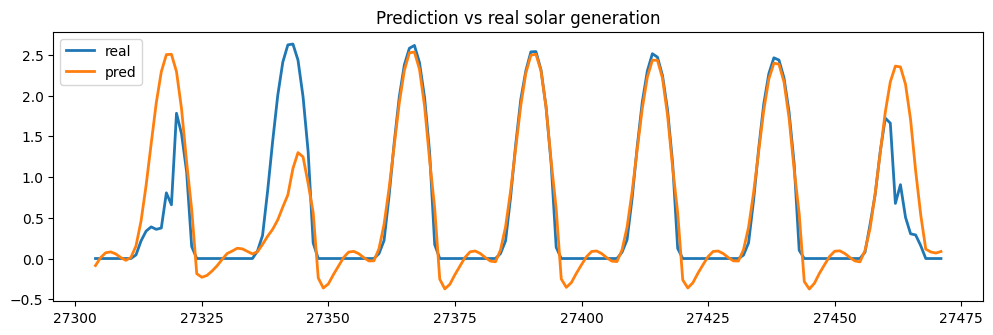

In [117]:

from matplotlib import pyplot as plt
from skforecast.model_selection import backtesting_forecaster

metric, predictions = backtesting_forecaster(
    forecaster=forecaster,
    y=df_solar_1.solar_generation,
    initial_train_size=None,
    fixed_train_size=False,
    steps=12,
    metric='mean_absolute_error',
    refit=False,
    verbose=True
)

fig, ax = plt.subplots(figsize=(12, 3.5))
df_solar_1.loc[predictions[1000:1168].index, 'solar_generation'].plot(ax=ax, linewidth=2, label='real')
predictions[1000:1168].plot(linewidth=2, label='prediction', ax=ax)
ax.set_title('Prediction vs real solar generation')
ax.legend();


In [118]:
forecaster = ForecasterAutoreg(
                 regressor     = Ridge(random_state=42),
                 lags          = 24, # This value will be replaced in the grid search
                 transformer_y = StandardScaler()
             )

# Lags used as predictors
lags_grid = [ [1], [1, 2], [1, 2, 3], [1, 2, 3, 4], [1, 2, 3, 4, 5], [1, 2, 3, 4, 5, 6], [1, 2, 3, 4, 5, 6, 7], [1, 2, 3, 4, 5, 6, 7, 8], [1, 2, 3, 4, 5, 6, 7, 8, 9], [1, 25], [1, 2, 25, 26], [1, 2, 3, 25, 26, 27], [1, 2, 3, 4, 25, 26, 27, 28], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33], [1, 25, 49], [1, 2, 25, 26, 49, 50], [1, 2, 3, 25, 26, 27, 49, 50, 51], [1, 2, 3, 4, 25, 26, 27, 28, 49, 50, 51, 52], [1, 2, 3, 4, 5, 25, 26, 27, 28, 29, 49, 50, 51, 52, 53], [1, 2, 3, 4, 5, 6, 25, 26, 27, 28, 29, 30, 49, 50, 51, 52, 53, 54], [1, 2, 3, 4, 5, 6, 7, 25, 26, 27, 28, 29, 30, 31, 49, 50, 51, 52, 53, 54, 55], [1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 30, 31, 32, 49, 50, 51, 52, 53, 54, 55, 56], [1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29, 30, 31, 32, 33, 49, 50, 51, 52, 53, 54, 55, 56, 57]]

# Regressor's hyperparameters
param_grid = {
              # 'alpha': np.logspace(-3, 5, 10),
              # 'tol': np.logspace(-1, -10, 10),
              # 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
              }

              # 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}

results_grid = grid_search_forecaster(
                   forecaster         = forecaster,
                   y                  = df_solar_1.solar_generation,
                   param_grid         = param_grid,
                   lags_grid          = lags_grid,
                   steps              = 12,
                   metric             = 'mean_squared_error',
                   refit              = False,
                   initial_train_size = len(df_solar_1) - 1,
                   fixed_train_size   = False,
                   return_best        = True,
                   verbose            = False
               )
results_grid

Number of models compared: 27.


loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]
                                                                                          
loop param_grid:   0%|                                              | 0/1 [00:00<?, ?it/s]

`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2] 
  Parameters: {}
  Backtesting metric: 0.07190111353866258



,lags,params,mean_squared_error
1,"[1, 2]",{},0.071901
8,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",{},0.085187
7,"[1, 2, 3, 4, 5, 6, 7, 8]",{},0.090283
2,"[1, 2, 3]",{},0.093300
5,"[1, 2, 3, 4, 5, 6]",{},0.093593
6,"[1, 2, 3, 4, 5, 6, 7]",{},0.093850
4,"[1, 2, 3, 4, 5]",{},0.095303
3,"[1, 2, 3, 4]",{},0.096177
17,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 25, 26, 27, 28, 29...",{},0.190670
16,"[1, 2, 3, 4, 5, 6, 7, 8, 25, 26, 27, 28, 29, 3...",{},0.199545
